##### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split



##### Data Loading

In [4]:
walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (1) (1).csv")
running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")
jogging_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/jogging - Jogging (1).csv")


/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/1101566354.py:1: DtypeWarning: Columns (1,2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (1) (1).csv")
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/1101566354.py:2: DtypeWarning: Columns (1,2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")


In [5]:
jogging_df.rename(columns={'1': 'Experiment'}, inplace=True)
walking_df = walking_df[walking_df['Experiment'].isin(jogging_df.Experiment.unique())]
running_df = running_df[running_df['experiment'].isin(jogging_df.Experiment.unique())]
jogging_df.loc[jogging_df['Time (s)'].notna(),'Label'] = 'jogging'
running_df.loc[running_df['Time (s)'].notna(),'Label'] = 'running'

In [6]:
walking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120363 entries, 0 to 120746
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Experiment                     120363 non-null  float64
 1   Time (s)                       52862 non-null   object 
 2   Linear Acceleration x (m/s^2)  52862 non-null   object 
 3   Linear Acceleration y (m/s^2)  52862 non-null   object 
 4   Linear Acceleration z (m/s^2)  52862 non-null   object 
 5   Time (s).1                     120275 non-null  object 
 6   Gyroscope x (rad/s)            120275 non-null  object 
 7   Gyroscope y (rad/s)            120275 non-null  object 
 8   Gyroscope z (rad/s)            120275 non-null  object 
 9   Label                          6070 non-null    object 
dtypes: float64(1), object(9)
memory usage: 10.1+ MB


In [7]:
running_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120562 entries, 0 to 120609
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   experiment                     120562 non-null  float64
 1   Time (s)                       53058 non-null   object 
 2   Linear Acceleration x (m/s^2)  53058 non-null   object 
 3   Linear Acceleration y (m/s^2)  53058 non-null   object 
 4   Linear Acceleration z (m/s^2)  53058 non-null   object 
 5   Time (s).1                     120467 non-null  object 
 6   Gyroscope x (rad/s)            120467 non-null  object 
 7   Gyroscope y (rad/s)            120467 non-null  object 
 8   Gyroscope z (rad/s)            120467 non-null  object 
 9   Absolute (rad/s)               30465 non-null   object 
 10  Label                          53058 non-null   object 
dtypes: float64(1), object(10)
memory usage: 11.0+ MB


In [8]:
jogging_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156473 entries, 0 to 156472
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Experiment                     156473 non-null  int64 
 1   Time (s)                       64719 non-null   object
 2   Linear Acceleration x (m/s^2)  64719 non-null   object
 3   Linear Acceleration y (m/s^2)  64719 non-null   object
 4   Linear Acceleration z (m/s^2)  64719 non-null   object
 5   Time (s).1                     156473 non-null  object
 6   Gyroscope x (rad/s)            156473 non-null  object
 7   Gyroscope y (rad/s)            156473 non-null  object
 8   Gyroscope z (rad/s)            156473 non-null  object
 9   Label                          64719 non-null   object
dtypes: int64(1), object(9)
memory usage: 11.9+ MB


In [9]:
walking_df.head()

Experiment  Time (s) Linear Acceleration x (m/s^2)  \
0         1.0  5,24E-03                      6,36E-01   
1         1.0  1,53E-02                      2,69E-01   
2         1.0  2,53E-02                      1,36E-01   
3         1.0  3,53E-02                     -9,98E-02   
4         1.0  4,53E-02                     -3,31E-01   

  Linear Acceleration y (m/s^2) Linear Acceleration z (m/s^2) Time (s).1  \
0                      1,15E+00                     -1,55E+00   5,82E-03   
1                      1,29E+00                     -1,57E+00   1,58E-02   
2                      1,49E+00                     -1,06E+00   2,59E-02   
3                      1,55E+00                     -3,90E-01   3,59E-02   
4                      1,46E+00                      4,85E-01   4,59E-02   

  Gyroscope x (rad/s) Gyroscope y (rad/s) Gyroscope z (rad/s)    Label  
0           -4,16E-01           -9,86E-01           -5,83E-01  walking  
1           -4,64E-01           -9,81E-01           -5,24E-01  walking  
2           -5,24E-01           -9,75E-01           -4,71E-01  walking  
3           -5,81E-01           -9,01E-01           -4,26E-01  walking  
4           -5,82E-01           -7,14E-01           -3,72E-01  walking

In [10]:
running_df.head()

experiment  Time (s) Linear Acceleration x (m/s^2)  \
0         1.0  4,25E-03                     -2,47E+00   
1         1.0  1,43E-02                     -2,76E+00   
2         1.0  2,43E-02                     -2,85E+00   
3         1.0  3,43E-02                     -2,79E+00   
4         1.0  4,43E-02                     -2,91E+00   

  Linear Acceleration y (m/s^2) Linear Acceleration z (m/s^2) Time (s).1  \
0                      1,96E+00                     -2,07E+00  -2,49E-03   
1                      2,14E+00                     -2,55E+00   7,53E-03   
2                      2,41E+00                     -2,96E+00   1,75E-02   
3                      2,74E+00                     -3,38E+00   2,76E-02   
4                      2,91E+00                     -3,59E+00   3,76E-02   

  Gyroscope x (rad/s) Gyroscope y (rad/s) Gyroscope z (rad/s)  \
0           -2,74E-01           -5,30E-01            2,45E-01   
1           -3,75E-01           -5,30E-01            2,89E-01   
2           -4,80E-01           -4,58E-01            3,27E-01   
3           -6,01E-01           -3,49E-01            3,45E-01   
4           -7,39E-01           -2,25E-01            3,48E-01   

  Absolute (rad/s)    Label  
0         6,45E-01  running  
1         7,11E-01  running  
2         7,40E-01  running  
3         7,76E-01  running  
4         8,47E-01  running

In [11]:
jogging_df.head()

Experiment     Time (s) Linear Acceleration x (m/s^2)  \
0           1  0,101486524                 0,06818556786   
1           1  0,106432201                  0,1308043003   
2           1  0,111377774                  0,1555417776   
3           1  0,116323399                  0,1685538292   
4           1  0,121291159                  0,2831140757   

  Linear Acceleration y (m/s^2) Linear Acceleration z (m/s^2)   Time (s).1  \
0                 0,02603590488                 0,06165242195  0,100263763   
1                 0,08983400464                   0,147849679  0,102736524   
2                  0,1573096514                   0,312802434  0,105209388   
3                  0,2018541247                  0,5971755981  0,107682201   
4                  0,3047571182                  0,5918277502  0,110155013   

  Gyroscope x (rad/s) Gyroscope y (rad/s) Gyroscope z (rad/s)    Label  
0        0,6567161679       -0,7425339818        0,9977238774  jogging  
1         0,650857389       -0,9034507871          1,06117177  jogging  
2        0,6338136196          -0,9253546         1,064367533  jogging  
3        0,5927355886       -0,9541159272         1,042996287  jogging  
4         0,582615912        -0,992464304         1,048322439  jogging

In [12]:
walking_df.describe()

Experiment
count  120363.000000
mean        5.989307
std         2.007731
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         8.000000

In [13]:
running_df.describe()

experiment
count  120562.000000
mean        5.984962
std         2.009734
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         8.000000

In [14]:
jogging_df.describe()

Experiment
count  156473.000000
mean        4.949557
std         2.597969
min         1.000000
25%         2.000000
50%         6.000000
75%         7.000000
max         8.000000

In [15]:
running_df.isnull().sum()

experiment                           0
Time (s)                         67504
Linear Acceleration x (m/s^2)    67504
Linear Acceleration y (m/s^2)    67504
Linear Acceleration z (m/s^2)    67504
Time (s).1                          95
Gyroscope x (rad/s)                 95
Gyroscope y (rad/s)                 95
Gyroscope z (rad/s)                 95
Absolute (rad/s)                 90097
Label                            67504
dtype: int64

In [16]:
walking_df.isnull().sum()

Experiment                            0
Time (s)                          67501
Linear Acceleration x (m/s^2)     67501
Linear Acceleration y (m/s^2)     67501
Linear Acceleration z (m/s^2)     67501
Time (s).1                           88
Gyroscope x (rad/s)                  88
Gyroscope y (rad/s)                  88
Gyroscope z (rad/s)                  88
Label                            114293
dtype: int64

In [17]:
jogging_df.isnull().sum()

Experiment                           0
Time (s)                         91754
Linear Acceleration x (m/s^2)    91754
Linear Acceleration y (m/s^2)    91754
Linear Acceleration z (m/s^2)    91754
Time (s).1                           0
Gyroscope x (rad/s)                  0
Gyroscope y (rad/s)                  0
Gyroscope z (rad/s)                  0
Label                            91754
dtype: int64

In [18]:
# Update clean function to handle lowercase column name variation
def clean_sensor_df(df, label_name):
    df = df.copy()
    df['Label'] = label_name

    # Standardize experiment column name
    if 'Experiment' not in df.columns and 'experiment' in df.columns:
        df.rename(columns={'experiment': 'Experiment'}, inplace=True)

    # Convert sensor columns to numeric (replace comma with dot)
    sensor_cols = [
        "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)",
        "Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"
    ]
    for col in sensor_cols:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    # Convert timestamp to float
    df["Time (s)"] = df["Time (s)"].astype(str).str.replace(',', '.').astype(float)
    return df[["Experiment", "Time (s)"] + sensor_cols + ["Label"]].dropna()

# Clean both datasets again
walking_clean = clean_sensor_df(walking_df, "walking")
running_clean = clean_sensor_df(running_df, "running")
jogging_clean = clean_sensor_df(running_df, "jogging")

# Merge
combined_df = pd.concat([walking_clean, running_clean, jogging_clean], ignore_index=True)


# Perform 80/20 split per experiment
train_dfs = []
test_dfs = []

for exp in combined_df["Experiment"].unique():
    exp_df = combined_df[combined_df["Experiment"] == exp]
    train_split, test_split = train_test_split(exp_df, test_size=0.2, random_state=42, stratify=exp_df["Label"])
    train_dfs.append(train_split)
    test_dfs.append(test_split)

# Concatenate all splits
train_df = pd.concat(train_dfs).reset_index(drop=True)
test_df = pd.concat(test_dfs).reset_index(drop=True)

# Output the shapes
train_df.shape, test_df.shape

((126956, 9), (31744, 9))

In [19]:
# Common sensor columns
sensor_cols = [
    "Linear Acceleration x (m/s^2)", "Linear Acceleration y (m/s^2)", "Linear Acceleration z (m/s^2)",
    "Gyroscope x (rad/s)", "Gyroscope y (rad/s)", "Gyroscope z (rad/s)"
]

# Sort and interpolate train set
train_df = train_df.sort_values(by=["Experiment", "Time (s)"]).reset_index(drop=True)
train_df[sensor_cols] = (
    train_df.groupby("Experiment")[sensor_cols]
    .transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
)

trimmed_means = {}

for exp in train_df["Experiment"].unique():
    exp_trimmed = {}
    for col in sensor_cols:
        series = train_df.loc[train_df["Experiment"] == exp, col]
        trimmed = series[(series > series.quantile(0.01)) & (series < series.quantile(0.99))]
        exp_trimmed[col] = trimmed.mean()
    trimmed_means[exp] = exp_trimmed

for exp in train_df["Experiment"].unique():
    for col in sensor_cols:
        mask = (train_df["Experiment"] == exp) & (train_df[col].isna())
        train_df.loc[mask, col] = trimmed_means[exp][col]

test_df = test_df.sort_values(by=["Experiment", "Time (s)"]).reset_index(drop=True)
test_df[sensor_cols] = (
    test_df.groupby("Experiment")[sensor_cols]
    .transform(lambda group: group.interpolate(method='linear', limit_direction='both'))
)

# Fill test NaNs with trimmed means from corresponding train experiment
for exp in test_df["Experiment"].unique():
    if exp in trimmed_means:  # skip if test experiment doesn't exist in train
        for col in sensor_cols:
            mask = (test_df["Experiment"] == exp) & (test_df[col].isna())
            test_df.loc[mask, col] = trimmed_means[exp][col]

# Drop rows with missing labels
train_df = train_df.dropna(subset=["Label"])
test_df = test_df.dropna(subset=["Label"])

In [20]:
combined_df = train_df
combined_df.head()

Experiment  Time (s)  Linear Acceleration x (m/s^2)  \
0         1.0   0.00425                         -2.470   
1         1.0   0.00425                         -2.470   
2         1.0   0.00524                          0.636   
3         1.0   0.01430                         -2.760   
4         1.0   0.01530                          0.269   

   Linear Acceleration y (m/s^2)  Linear Acceleration z (m/s^2)  \
0                           1.96                          -2.07   
1                           1.96                          -2.07   
2                           1.15                          -1.55   
3                           2.14                          -2.55   
4                           1.29                          -1.57   

   Gyroscope x (rad/s)  Gyroscope y (rad/s)  Gyroscope z (rad/s)    Label  
0               -0.274               -0.530                0.245  jogging  
1               -0.274               -0.530                0.245  running  
2               -0.416               -0.986               -0.583  walking  
3               -0.375               -0.530                0.289  jogging  
4               -0.464               -0.981               -0.524  walking

In [21]:
combined_df.shape

(126956, 9)

In [22]:
# Add derived features: acceleration and gyroscope magnitude
combined_df["acc_mag"] = np.sqrt(
    combined_df["Linear Acceleration x (m/s^2)"]**2 +
    combined_df["Linear Acceleration y (m/s^2)"]**2 +
    combined_df["Linear Acceleration z (m/s^2)"]**2
)

combined_df["gyro_mag"] = np.sqrt(
    combined_df["Gyroscope x (rad/s)"]**2 +
    combined_df["Gyroscope y (rad/s)"]**2 +
    combined_df["Gyroscope z (rad/s)"]**2
)

# Define window size in seconds
window_size = 1.0

# Sort the data to ensure order
combined_df.sort_values(by=["Label", "Experiment", "Time (s)"], inplace=True)

# Function to assign window index
def compute_window_index(df, window_size):
    return (df["Time (s)"] // window_size).astype(int)

combined_df["window"] = combined_df.groupby(["Label", "Experiment"]).apply(
    compute_window_index, window_size=window_size
).reset_index(drop=True)

# Aggregate features per window
agg_features = combined_df.groupby(["Label", "Experiment", "window"]).agg({
    "Linear Acceleration x (m/s^2)": ['mean', 'std'],
    "Linear Acceleration y (m/s^2)": ['mean', 'std'],
    "Linear Acceleration z (m/s^2)": ['mean', 'std'],
    "Gyroscope x (rad/s)": ['mean', 'std'],
    "Gyroscope y (rad/s)": ['mean', 'std'],
    "Gyroscope z (rad/s)": ['mean', 'std'],
    "acc_mag": ['mean', 'std'],
    "gyro_mag": ['mean', 'std']
}).reset_index()

# Flatten column names
agg_features.columns = ['_'.join(col).strip('_') for col in agg_features.columns.values]

# Compute summary statistics over the aggregated features
feature_cols = [col for col in agg_features.columns if any(stat in col for stat in ['mean', 'std'])]
summary_stats = agg_features[feature_cols].describe().transpose()

# Show the first few rows of the summary statistics
summary_stats.head()


/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/4058705090.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df["window"] = combined_df.groupby(["Label", "Experiment"]).apply(


count      mean       std        min  \
Linear Acceleration x (m/s^2)_mean  1476.0  3.959908  6.219959 -17.000000   
Linear Acceleration x (m/s^2)_std   1475.0  9.917069  6.430152   0.070711   
Linear Acceleration y (m/s^2)_mean  1476.0 -1.217027  3.693452 -17.575000   
Linear Acceleration y (m/s^2)_std   1475.0  8.753307  5.907025   0.074246   
Linear Acceleration z (m/s^2)_mean  1476.0  0.168968  2.287642  -9.712621   

                                         25%        50%        75%        max  
Linear Acceleration x (m/s^2)_mean  0.030520   2.835759   6.813214  28.705275  
Linear Acceleration x (m/s^2)_std   1.873587  11.908962  15.107214  24.617013  
Linear Acceleration y (m/s^2)_mean -2.979506  -0.533067   0.270675   9.357500  
Linear Acceleration y (m/s^2)_std   1.964530   9.243024  13.795875  23.022954  
Linear Acceleration z (m/s^2)_mean -0.563211   0.235697   1.322179   9.807258

In [23]:
# Set seaborn style
sns.set(style="whitegrid")

# Select features for boxplots
features_to_plot = [
    "acc_mag_mean", "acc_mag_std",
    "gyro_mag_mean", "gyro_mag_std"
]

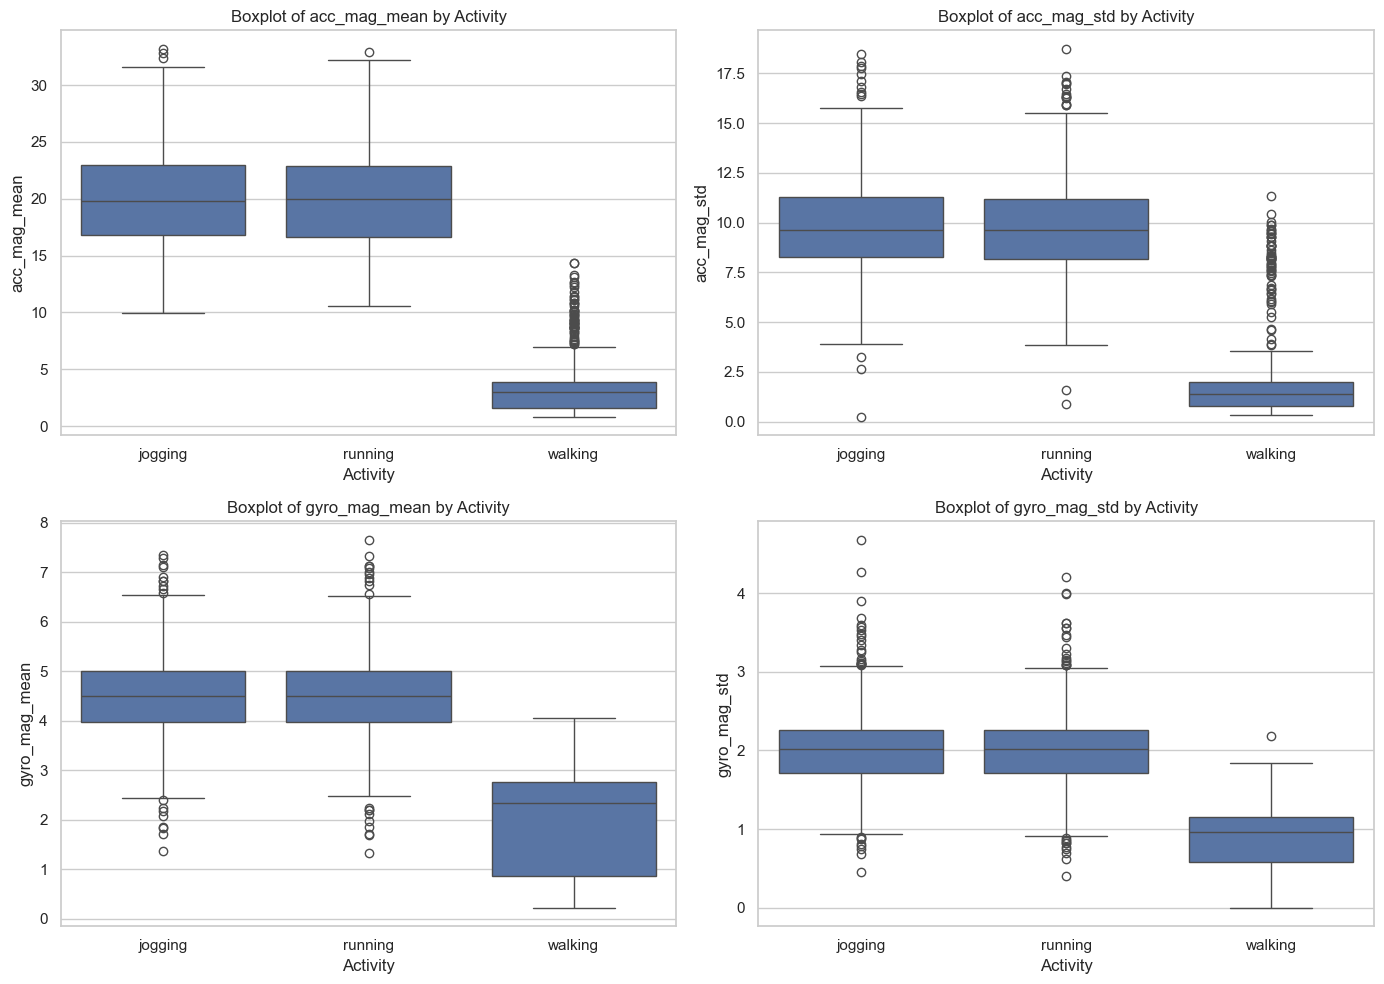

In [24]:
# Restore correct label column name
agg_features.rename(columns={"Label_": "Label"}, inplace=True)

# Create boxplots for selected features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=agg_features, x="Label", y=feature)
    plt.title(f'Boxplot of {feature} by Activity')
    plt.xlabel("Activity")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()



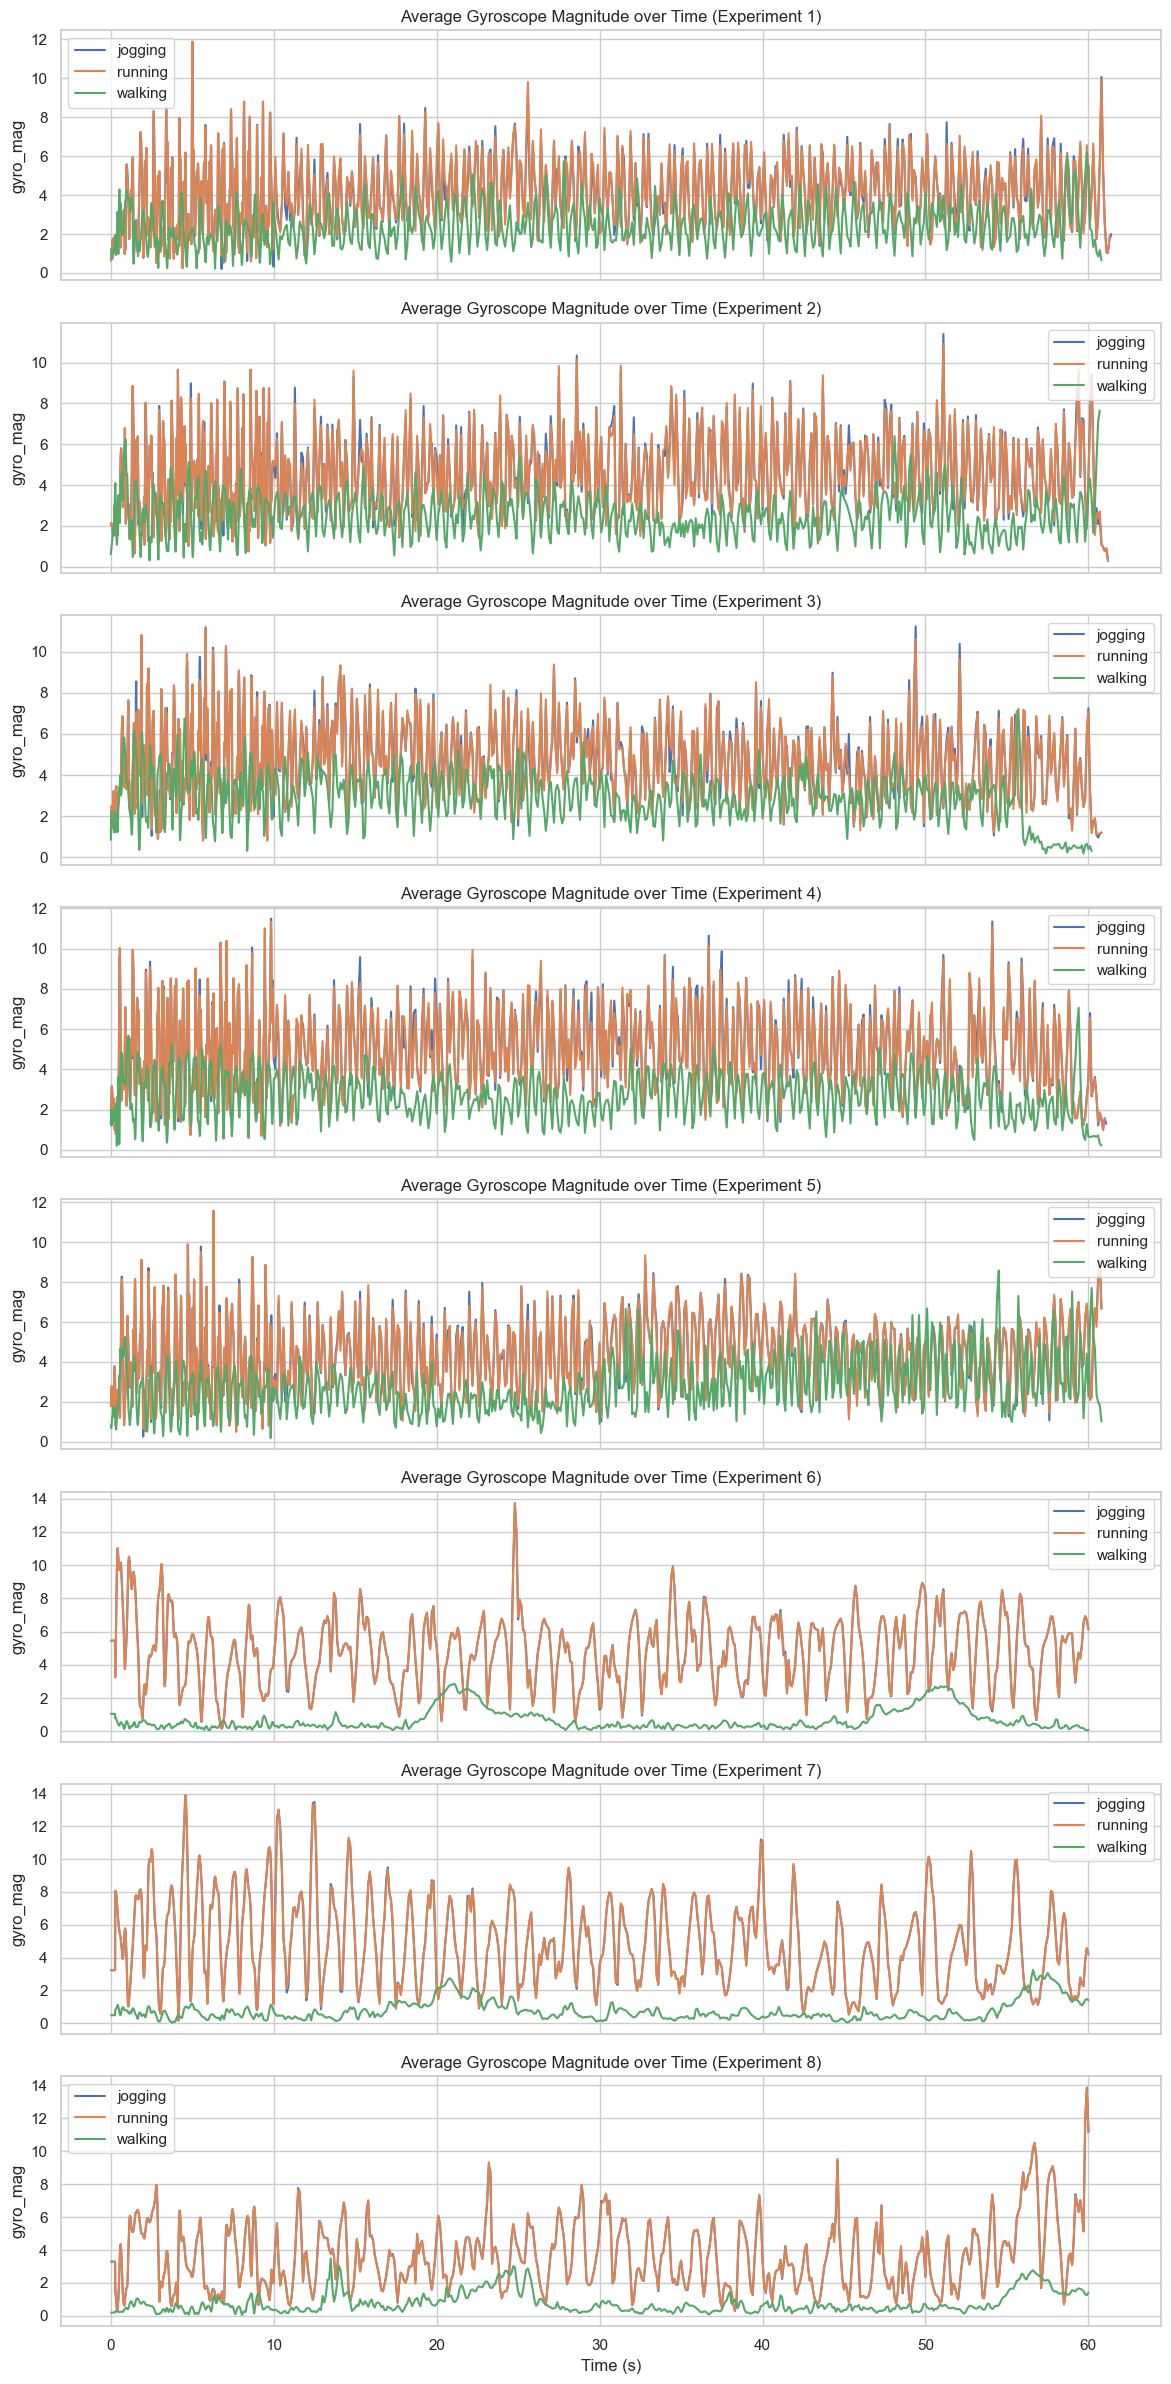

In [25]:
# Create average gyroscope magnitude per time (averaged across all experiments for each activity)
gyro_avg_per_time = combined_df.groupby(["Label", "Experiment", "Time (s)"])["gyro_mag"].mean().reset_index()

# Plot gyroscope magnitude over time per experiment
unique_experiments = sorted(combined_df["Experiment"].unique())
num_experiments = len(unique_experiments)

# Create a subplot for each experiment
fig, axs = plt.subplots(nrows=num_experiments, figsize=(12, 3 * num_experiments), sharex=True)

for i, exp in enumerate(unique_experiments):
    ax = axs[i] if num_experiments > 1 else axs
    for label in gyro_avg_per_time["Label"].unique():
        subset = gyro_avg_per_time[(gyro_avg_per_time["Experiment"] == exp) & (gyro_avg_per_time["Label"] == label)]
        ax.plot(subset["Time (s)"], subset["gyro_mag"], label=label)
    ax.set_title(f"Average Gyroscope Magnitude over Time (Experiment {int(exp)})")
    ax.set_ylabel("gyro_mag")
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

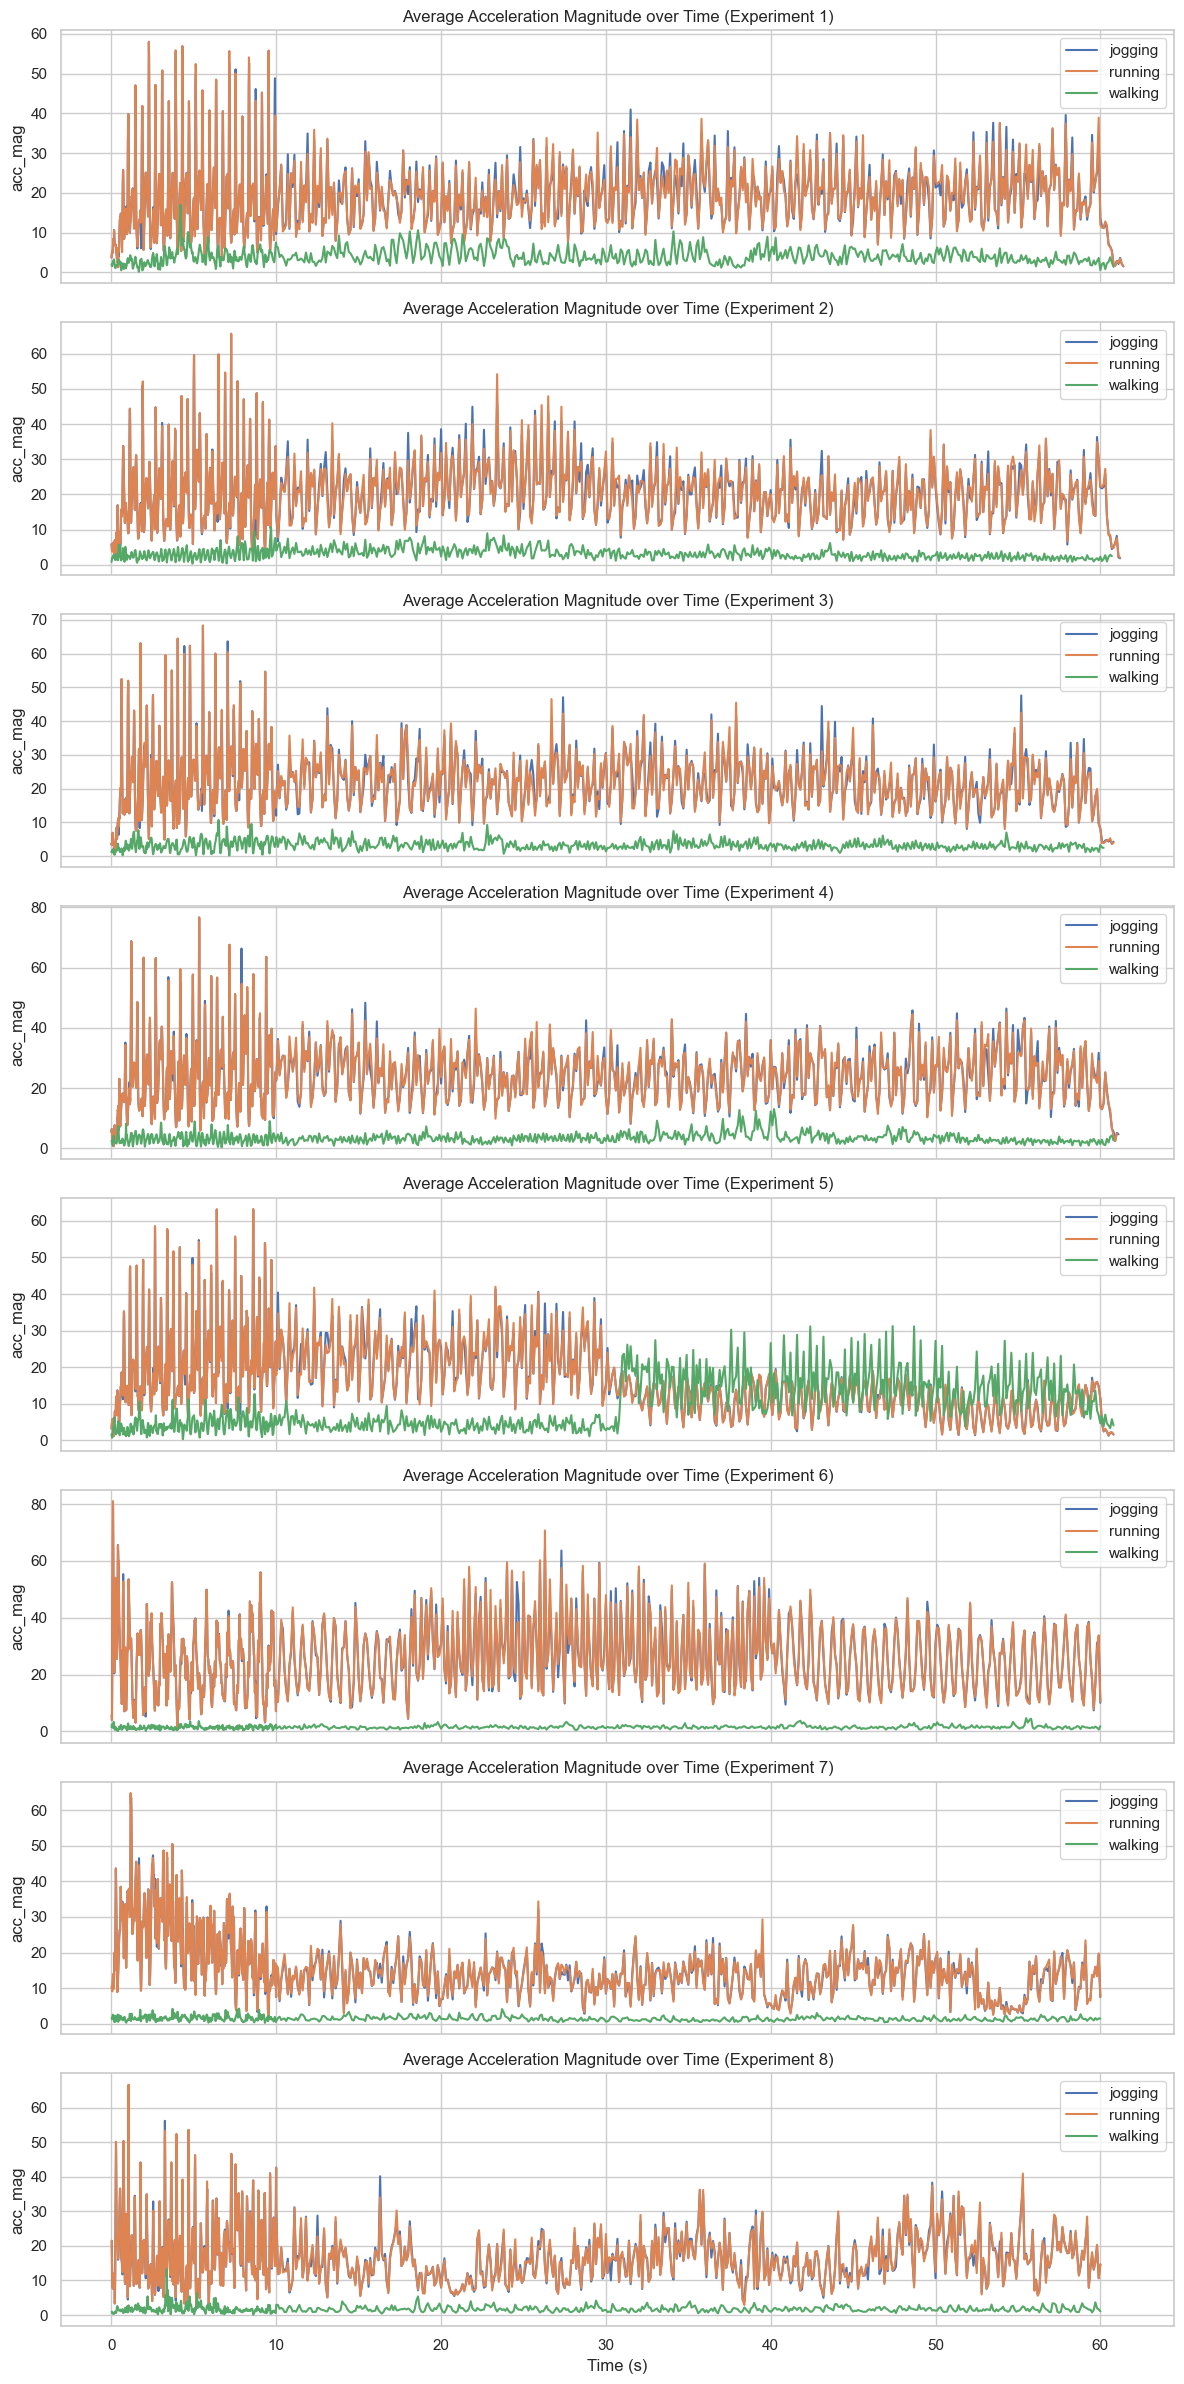

In [26]:
# Compute average acceleration magnitude per time (across experiments and labels)
combined_df["acc_mag"] = np.sqrt(
    combined_df["Linear Acceleration x (m/s^2)"]**2 +
    combined_df["Linear Acceleration y (m/s^2)"]**2 +
    combined_df["Linear Acceleration z (m/s^2)"]**2
)

# Group by label, experiment, and time to compute average acc_mag
acc_avg_per_time = combined_df.groupby(["Label", "Experiment", "Time (s)"])["acc_mag"].mean().reset_index()

# Plot acceleration magnitude over time per experiment
fig, axs = plt.subplots(nrows=num_experiments, figsize=(12, 3 * num_experiments), sharex=True)

for i, exp in enumerate(unique_experiments):
    ax = axs[i] if num_experiments > 1 else axs
    for label in acc_avg_per_time["Label"].unique():
        subset = acc_avg_per_time[(acc_avg_per_time["Experiment"] == exp) & (acc_avg_per_time["Label"] == label)]
        ax.plot(subset["Time (s)"], subset["acc_mag"], label=label)
    ax.set_title(f"Average Acceleration Magnitude over Time (Experiment {int(exp)})")
    ax.set_ylabel("acc_mag")
    ax.legend()

plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

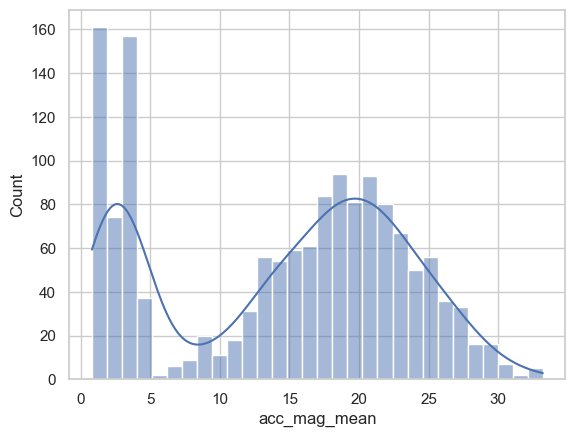

In [27]:
sns.histplot(data=agg_features, x="acc_mag_mean", bins=30, kde=True)
plt.show()

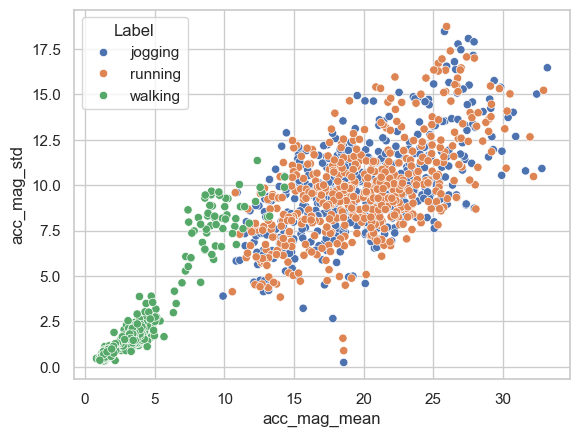

In [28]:
sns.scatterplot(data=agg_features, x="acc_mag_mean", y="acc_mag_std", hue="Label")
plt.show()

In [29]:
walking_df

Experiment  Time (s) Linear Acceleration x (m/s^2)  \
0              1.0  5,24E-03                      6,36E-01   
1              1.0  1,53E-02                      2,69E-01   
2              1.0  2,53E-02                      1,36E-01   
3              1.0  3,53E-02                     -9,98E-02   
4              1.0  4,53E-02                     -3,31E-01   
...            ...       ...                           ...   
120742         8.0       NaN                           NaN   
120743         8.0       NaN                           NaN   
120744         8.0       NaN                           NaN   
120745         8.0       NaN                           NaN   
120746         8.0       NaN                           NaN   

       Linear Acceleration y (m/s^2) Linear Acceleration z (m/s^2) Time (s).1  \
0                           1,15E+00                     -1,55E+00   5,82E-03   
1                           1,29E+00                     -1,57E+00   1,58E-02   
2                           1,49E+00                     -1,06E+00   2,59E-02   
3                           1,55E+00                     -3,90E-01   3,59E-02   
4                           1,46E+00                      4,85E-01   4,59E-02   
...                              ...                           ...        ...   
120742                           NaN                           NaN   6,00E+01   
120743                           NaN                           NaN   6,00E+01   
120744                           NaN                           NaN   6,00E+01   
120745                           NaN                           NaN   6,00E+01   
120746                           NaN                           NaN   6,00E+01   

       Gyroscope x (rad/s) Gyroscope y (rad/s) Gyroscope z (rad/s)    Label  
0                -4,16E-01           -9,86E-01           -5,83E-01  walking  
1                -4,64E-01           -9,81E-01           -5,24E-01  walking  
2                -5,24E-01           -9,75E-01           -4,71E-01  walking  
3                -5,81E-01           -9,01E-01           -4,26E-01  walking  
4                -5,82E-01           -7,14E-01           -3,72E-01  walking  
...                    ...                 ...                 ...      ...  
120742            3,57E-01           -1,03E+00           -1,03E+00      NaN  
120743            3,58E-01           -1,05E+00           -1,02E+00      NaN  
120744            3,54E-01           -1,07E+00           -1,01E+00      NaN  
120745            3,52E-01           -1,08E+00           -9,99E-01      NaN  
120746            3,52E-01           -1,09E+00           -9,87E-01      NaN  

[120363 rows x 10 columns]

In [30]:
train_df = agg_features.copy()
agg_features.head()


Label  Experiment  window  Linear Acceleration x (m/s^2)_mean  \
0  jogging         1.0       0                            0.166301   
1  jogging         1.0       1                            6.087244   
2  jogging         1.0       2                            1.907427   
3  jogging         1.0       3                            4.591951   
4  jogging         1.0       4                            5.578084   

   Linear Acceleration x (m/s^2)_std  Linear Acceleration y (m/s^2)_mean  \
0                          11.051160                            3.154308   
1                          10.260818                           -2.910462   
2                          13.604548                            0.679200   
3                          14.063761                           -2.692590   
4                          13.948848                           -2.307624   

   Linear Acceleration y (m/s^2)_std  Linear Acceleration z (m/s^2)_mean  \
0                           6.778179                            2.311536   
1                          11.414800                           -0.754418   
2                          11.889978                            1.152146   
3                          12.094003                            4.054644   
4                          12.398184                           -0.289902   

   Linear Acceleration z (m/s^2)_std  Gyroscope x (rad/s)_mean  \
0                           3.977171                 -1.035122   
1                           5.744800                  0.359138   
2                           8.189688                  0.183490   
3                           8.825491                  0.481791   
4                           3.860008                 -0.840422   

   Gyroscope x (rad/s)_std  Gyroscope y (rad/s)_mean  Gyroscope y (rad/s)_std  \
0                 1.853282                 -0.345492                 1.178878   
1                 1.795270                  0.680652                 2.348447   
2                 2.635283                 -1.560659                 1.637162   
3                 2.572471                  0.506319                 2.238748   
4                 1.580138                 -0.916250                 1.897894   

   Gyroscope z (rad/s)_mean  Gyroscope z (rad/s)_std  acc_mag_mean  \
0                  1.030028                 2.232033     11.582224   
1                 -2.108849                 2.358591     15.053865   
2                  1.901226                 2.007753     17.884360   
3                 -1.415945                 2.571016     19.456318   
4                  1.730114                 2.803249     17.679559   

   acc_mag_std  gyro_mag_mean  gyro_mag_std  
0     7.982931       2.934177      1.837758  
1     9.258289       3.855282      2.085637  
2     8.673017       3.973597      1.957238  
3     9.156240       4.125606      1.877181  
4     9.159411       3.773880      2.034659

In [31]:
from scipy.stats.mstats import winsorize

# Features to Winsorize
features_to_winsorize = [
    "acc_mag_mean", "acc_mag_std",
    "gyro_mag_mean", "gyro_mag_std"
]

# Winsorization config: cap at 1st and 99th percentiles
limits = (0.01, 0.01)

# Create copy to store winsorized data
train_df_winsorized = train_df.copy()

# Store summary statistics before and after Winsorization
before_after_summary = {}

for feature in features_to_winsorize:
    before = train_df[feature].describe()
    train_df_winsorized[feature] = winsorize(train_df[feature], limits=limits)
    after = train_df_winsorized[feature].describe()
    before_after_summary[feature] = pd.DataFrame({"Before": before, "After": after})

# Show result for one example feature
before_after_summary["acc_mag_mean"]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


Before        After
count  1476.000000  1476.000000
mean     14.494428    14.481226
std       8.726771     8.697428
min       0.818861     1.204415
25%       3.842486     3.842486
50%      16.716094    16.716094
75%      21.310669    21.310669
max      33.194549    29.933717

### ANDREEA 


In [48]:
# View columns of each DataFrame
print("Walking columns:", walking_df.columns)
print("Running columns:", running_df.columns)
print("Jogging columns:", jogging_df.columns)


Walking columns: Index(['experiment', 'time (s)', 'linear acceleration x (m/s^2)',
       'linear acceleration y (m/s^2)', 'linear acceleration z (m/s^2)',
       'time (s).1', 'gyroscope x (rad/s)', 'gyroscope y (rad/s)',
       'gyroscope z (rad/s)', 'label'],
      dtype='object')
Running columns: Index(['experiment', 'time (s)', 'linear acceleration x (m/s^2)',
       'linear acceleration y (m/s^2)', 'linear acceleration z (m/s^2)',
       'time (s).1', 'gyroscope x (rad/s)', 'gyroscope y (rad/s)',
       'gyroscope z (rad/s)', 'absolute (rad/s)', 'label'],
      dtype='object')
Jogging columns: Index(['experiment', 'time (s)', 'linear acceleration x (m/s^2)',
       'linear acceleration y (m/s^2)', 'linear acceleration z (m/s^2)',
       'time (s).1', 'gyroscope x (rad/s)', 'gyroscope y (rad/s)',
       'gyroscope z (rad/s)', 'label'],
      dtype='object')


In [51]:
walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (1) (1).csv")
running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")
jogging_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/jogging - Jogging (1).csv")


/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/1101566354.py:1: DtypeWarning: Columns (1,2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (1) (1).csv")
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/1101566354.py:2: DtypeWarning: Columns (1,2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")


In [52]:
sensor_columns = [
    'linear acceleration x (m/s^2)',
    'linear acceleration y (m/s^2)',
    'linear acceleration z (m/s^2)',
    'gyroscope x (rad/s)',
    'gyroscope y (rad/s)',
    'gyroscope z (rad/s)'
]

print("Head of walking_df:")
print(walking_df.head())

print("\nData types:")
print(walking_df.dtypes)

print("\nAny NaNs in sensor columns:")
print(walking_df[sensor_columns].isna().sum())

print("\nUnique values in 'time (s)':")
print(walking_df['time (s)'].unique())

Head of walking_df:
   Experiment  Time (s) Linear Acceleration x (m/s^2)  \
0         1.0  5,24E-03                      6,36E-01   
1         1.0  1,53E-02                      2,69E-01   
2         1.0  2,53E-02                      1,36E-01   
3         1.0  3,53E-02                     -9,98E-02   
4         1.0  4,53E-02                     -3,31E-01   

  Linear Acceleration y (m/s^2) Linear Acceleration z (m/s^2) Time (s).1  \
0                      1,15E+00                     -1,55E+00   5,82E-03   
1                      1,29E+00                     -1,57E+00   1,58E-02   
2                      1,49E+00                     -1,06E+00   2,59E-02   
3                      1,55E+00                     -3,90E-01   3,59E-02   
4                      1,46E+00                      4,85E-01   4,59E-02   

  Gyroscope x (rad/s) Gyroscope y (rad/s) Gyroscope z (rad/s)    Label  
0           -4,16E-01           -9,86E-01           -5,83E-01  walking  
1           -4,64E-01           -9

KeyError: "None of [Index(['linear acceleration x (m/s^2)', 'linear acceleration y (m/s^2)',\n       'linear acceleration z (m/s^2)', 'gyroscope x (rad/s)',\n       'gyroscope y (rad/s)', 'gyroscope z (rad/s)'],\n      dtype='object')] are in the [columns]"

### Missin Value

In [33]:
# Normalize column names
for df in [walking_df, running_df, jogging_df]:
    df.columns = df.columns.str.strip().str.lower()

# List of sensor columns to use
sensor_columns = [
    'linear acceleration x (m/s^2)', 'linear acceleration y (m/s^2)', 'linear acceleration z (m/s^2)',
    'gyroscope x (rad/s)', 'gyroscope y (rad/s)', 'gyroscope z (rad/s)'
]

### 1. Missing Values
print("Missing Values:\n")
for name, df in zip(['Walking', 'Running', 'Jogging'], [walking_df, running_df, jogging_df]):
    print(f"{name}:\n{df.isnull().sum()}\n")


Missing Values:

Walking:
experiment                            0
time (s)                          67501
linear acceleration x (m/s^2)     67501
linear acceleration y (m/s^2)     67501
linear acceleration z (m/s^2)     67501
time (s).1                           88
gyroscope x (rad/s)                  88
gyroscope y (rad/s)                  88
gyroscope z (rad/s)                  88
label                            114293
dtype: int64

Running:
experiment                           0
time (s)                         67504
linear acceleration x (m/s^2)    67504
linear acceleration y (m/s^2)    67504
linear acceleration z (m/s^2)    67504
time (s).1                          95
gyroscope x (rad/s)                 95
gyroscope y (rad/s)                 95
gyroscope z (rad/s)                 95
absolute (rad/s)                 90097
label                            67504
dtype: int64

Jogging:
experiment                           0
time (s)                         91754
linear acceleration x

### Data Variation

In [34]:
print("Descriptive Statistics:\n")
for name, df in zip(['Walking', 'Running', 'Jogging'], [walking_df, running_df, jogging_df]):
    print(f"{name}:\n{df[sensor_columns].describe()}\n")

Descriptive Statistics:

Walking:
       linear acceleration x (m/s^2) linear acceleration y (m/s^2)  \
count                          52862                         52862   
unique                          5573                          5170   
top                         1,01E+00                     -1,01E+00   
freq                             119                           159   

       linear acceleration z (m/s^2) gyroscope x (rad/s) gyroscope y (rad/s)  \
count                          52862              120275              120275   
unique                          5142                4111                4075   
top                        -1,14E+00            1,09E-01           -1,03E+00   
freq                             106                 212                 172   

       gyroscope z (rad/s)  
count               120275  
unique                3454  
top              -1,18E+00  
freq                   174  

Running:
       linear acceleration x (m/s^2) linear acceleration y 

### Time-Series Sensor Signal

/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/1821374671.py:52: DtypeWarning: Columns (1,2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (1) (1).csv")
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/1821374671.py:53: DtypeWarning: Columns (1,2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/1821374671.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/1821374671.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df =

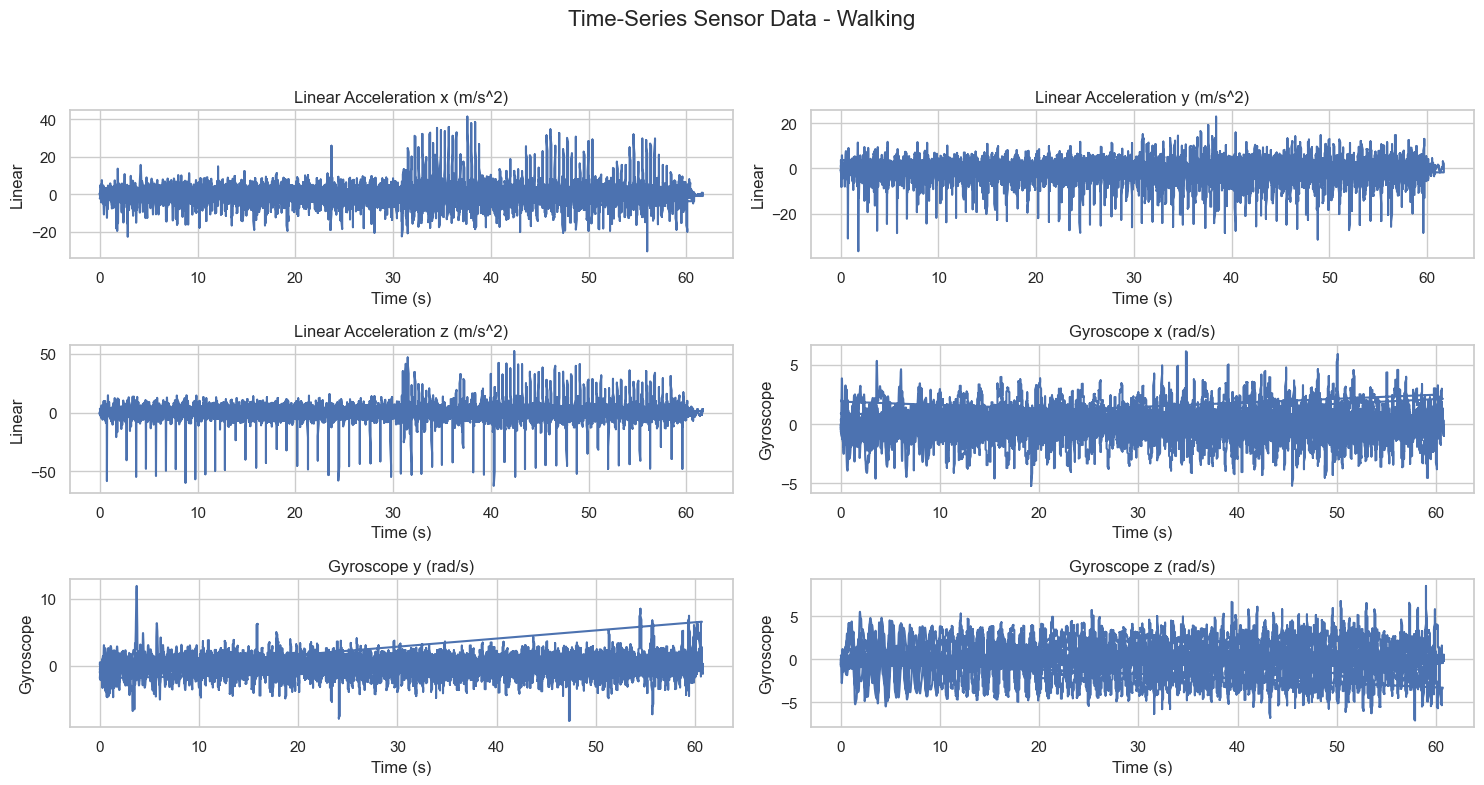

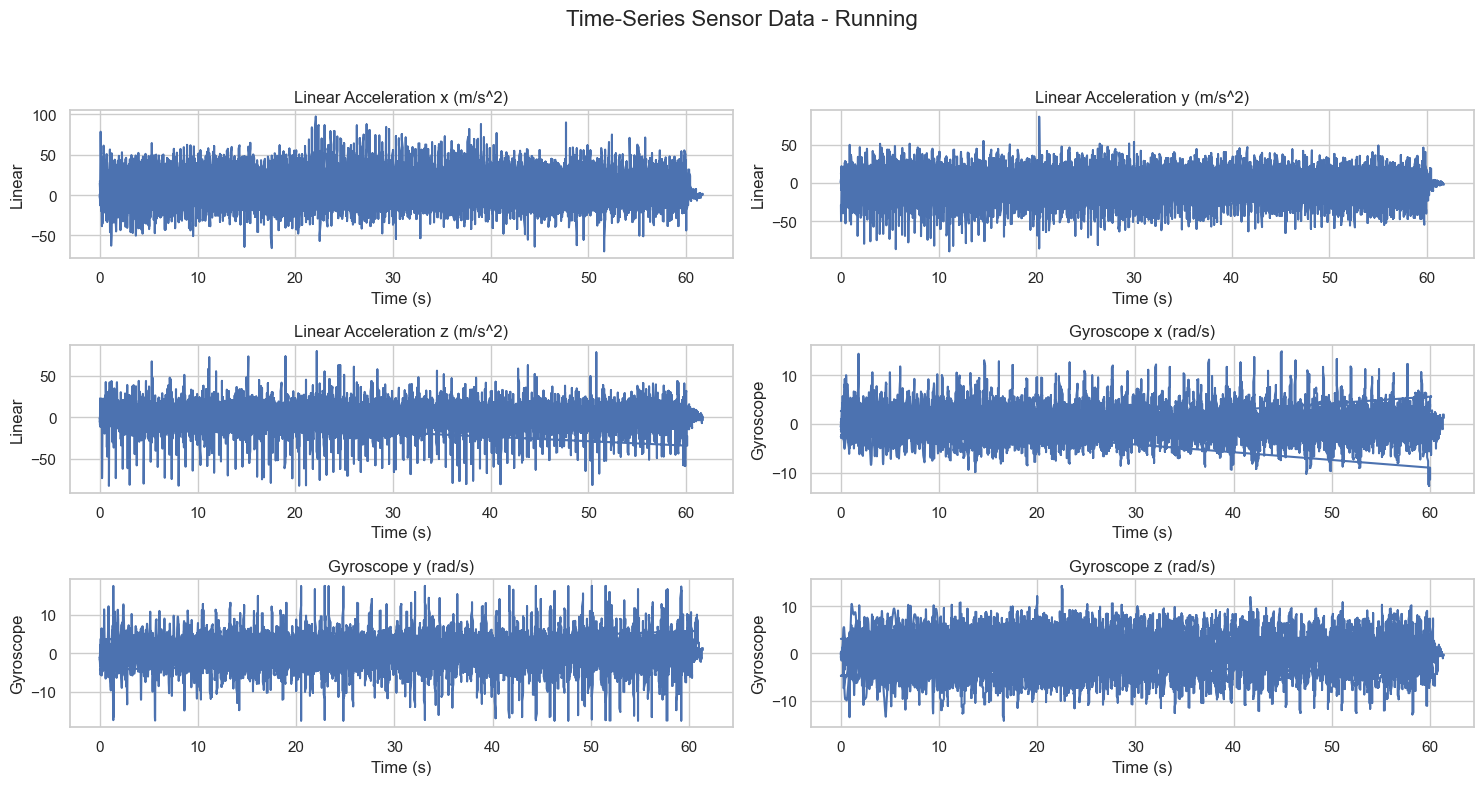

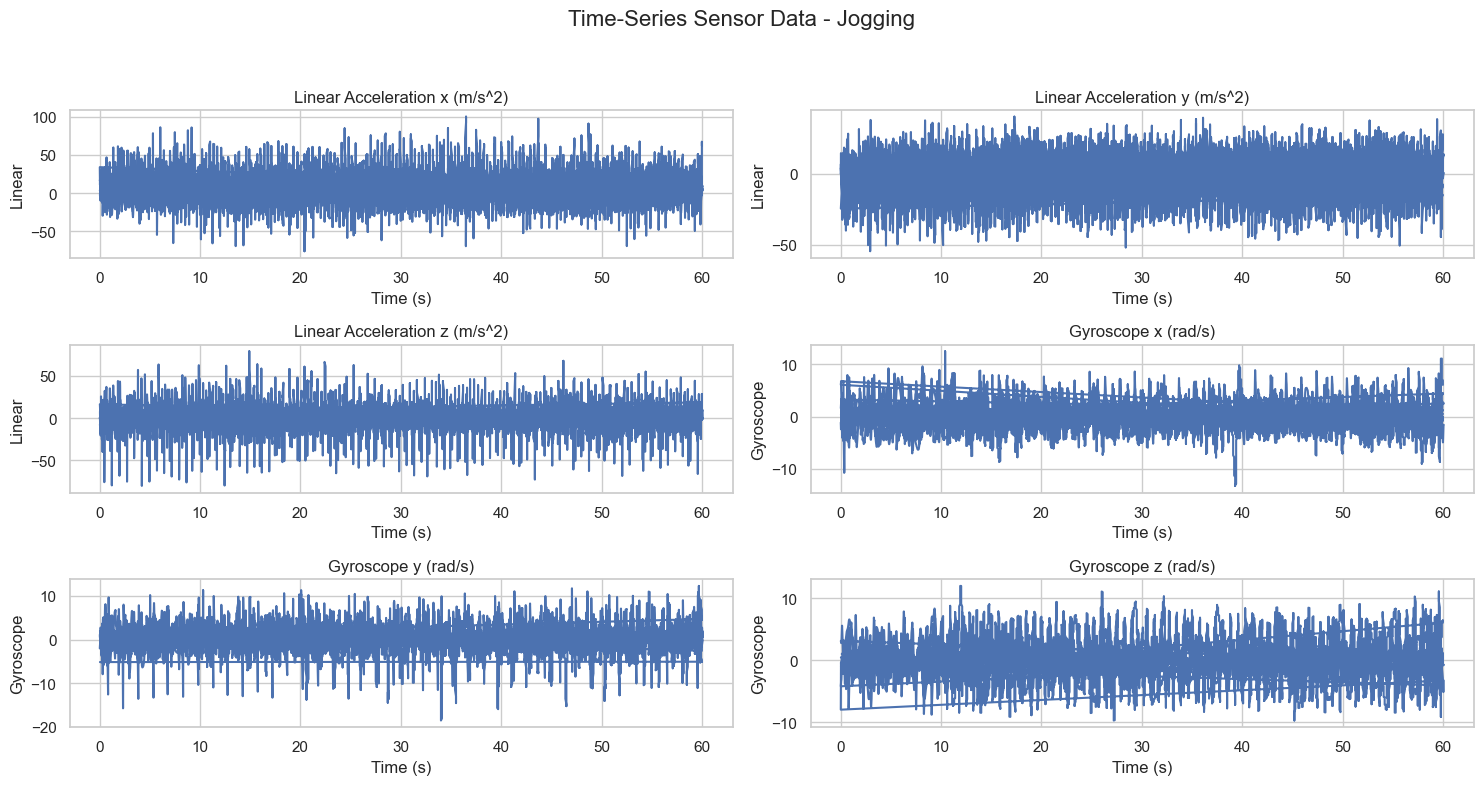

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct sensor column names from actual dataset (case-sensitive)
sensor_columns = [
    'Linear Acceleration x (m/s^2)',
    'Linear Acceleration y (m/s^2)',
    'Linear Acceleration z (m/s^2)',
    'Gyroscope x (rad/s)',
    'Gyroscope y (rad/s)',
    'Gyroscope z (rad/s)'
]

# Function to clean each dataset
def clean_dataframe(df):
    # Fix decimal commas and strip spaces
    df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)
    df.columns = df.columns.str.strip()

    # Convert time and sensor columns to numeric
    for col in ['Time (s)'] + sensor_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

# Function to plot
def plot_time_series(df, title):
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(sensor_columns):
        if col not in df.columns:
            print(f"Skipping {col} - not in {title} dataset")
            continue

        plt.subplot(3, 2, i+1)
        valid_data = df[['Time (s)', col]].dropna()

        if valid_data.empty:
            plt.title(f"{col} (no valid data)")
            continue

        plt.plot(valid_data['Time (s)'], valid_data[col])
        plt.title(col)
        plt.xlabel('Time (s)')
        plt.ylabel(col.split()[0])

    plt.suptitle(f'Time-Series Sensor Data - {title}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Load your original files
walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (1) (1).csv")
running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")
jogging_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/jogging - Jogging (1).csv")

# Clean all three
walking_df = clean_dataframe(walking_df)
running_df = clean_dataframe(running_df)
jogging_df = clean_dataframe(jogging_df)

# Plot all three
plot_time_series(walking_df, "Walking")
plot_time_series(running_df, "Running")
plot_time_series(jogging_df, "Jogging")


### Distribution of Sensor Readings — Histograms

In [55]:
import seaborn as sns

def plot_sensor_histograms(df, title):
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(sensor_columns):
        if col not in df.columns:
            print(f"Skipping {col} - not in {title} dataset")
            continue

        plt.subplot(3, 2, i+1)

        # Drop NaNs and convert if needed
        df[col] = pd.to_numeric(df[col], errors='coerce')
        valid_data = df[col].dropna()

        if valid_data.empty:
            plt.title(f"{col} (no valid data)")
            continue

        sns.histplot(valid_data, bins=50, kde=True)
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel("Frequency")

    plt.suptitle(f'Sensor Reading Distributions - {title}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


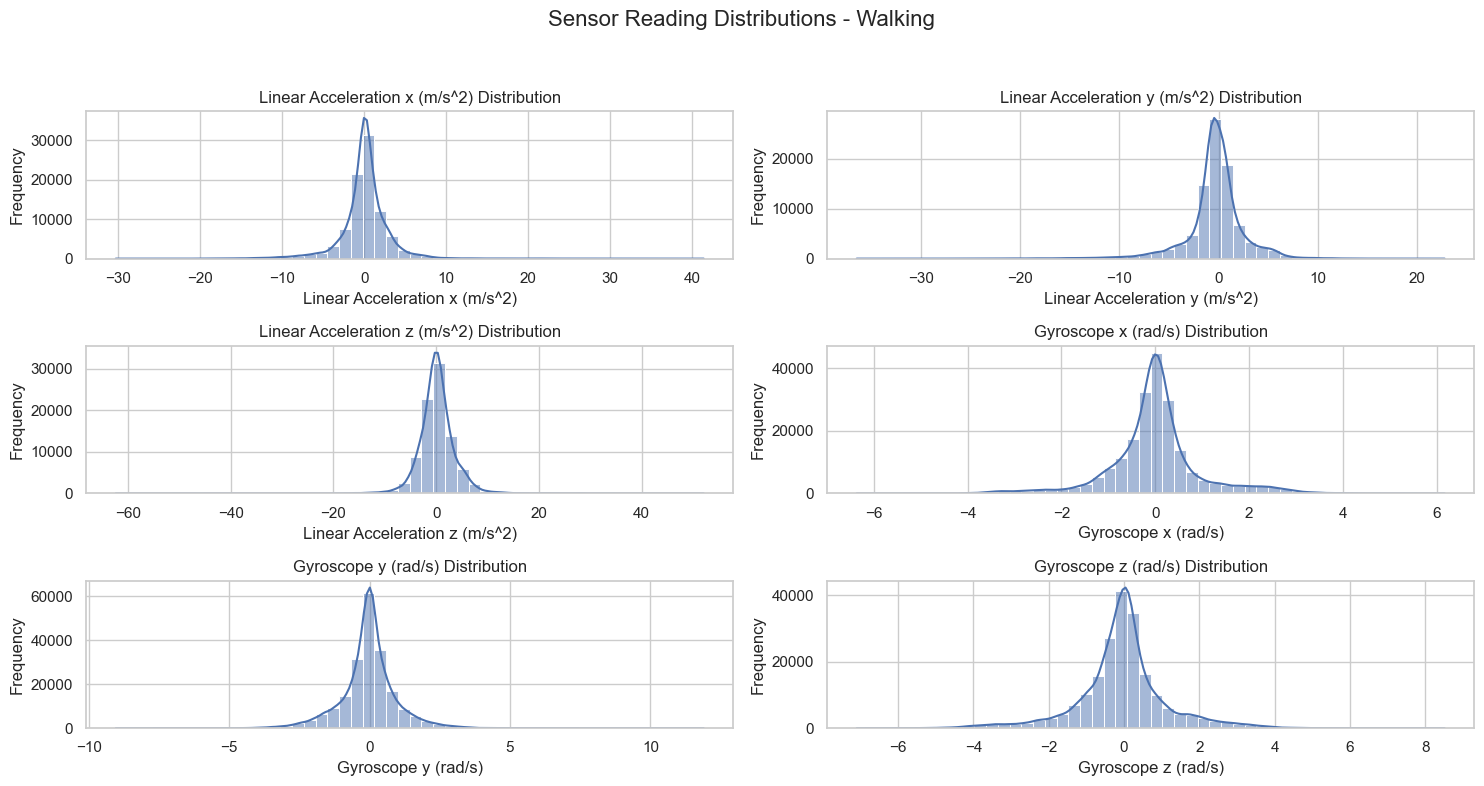

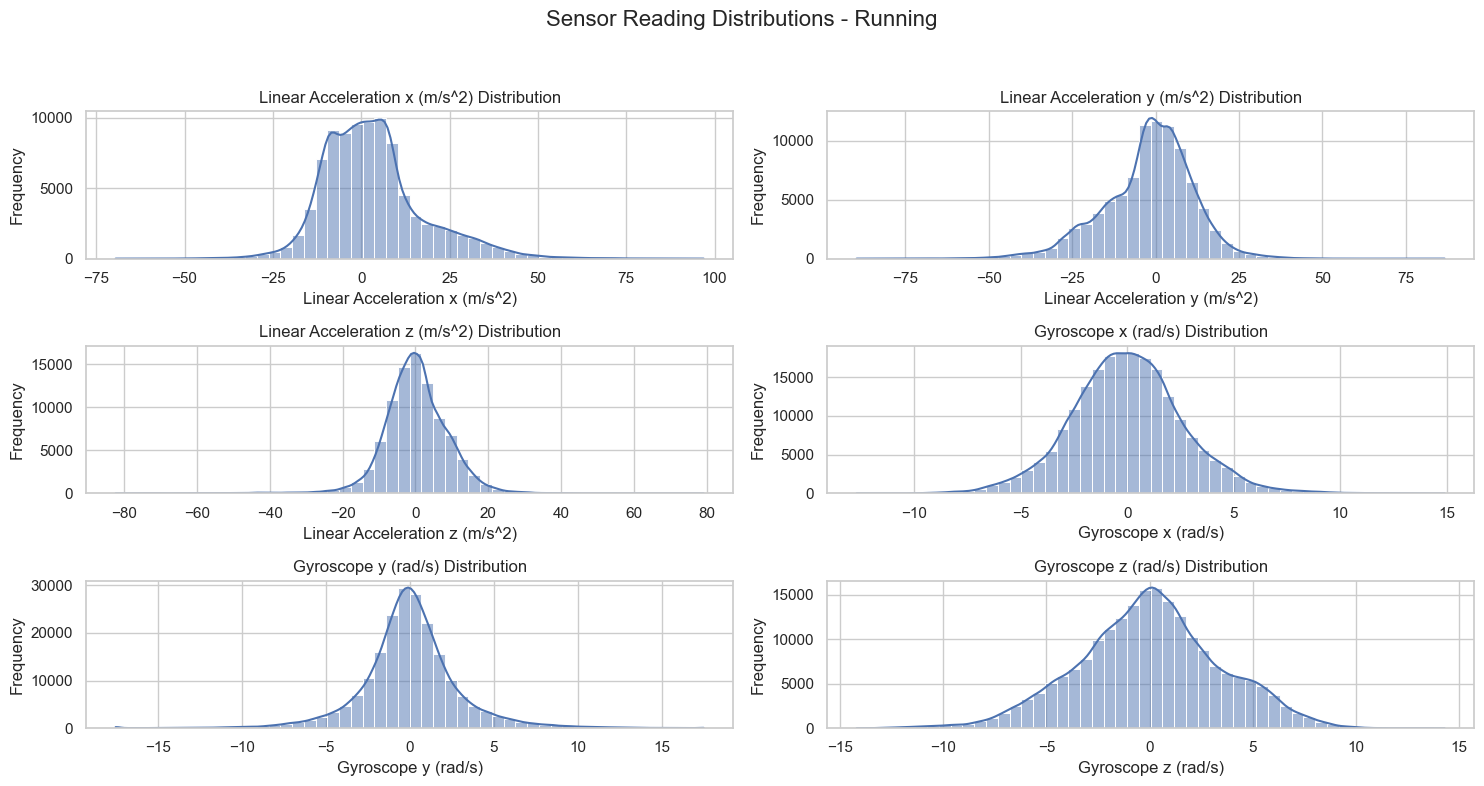

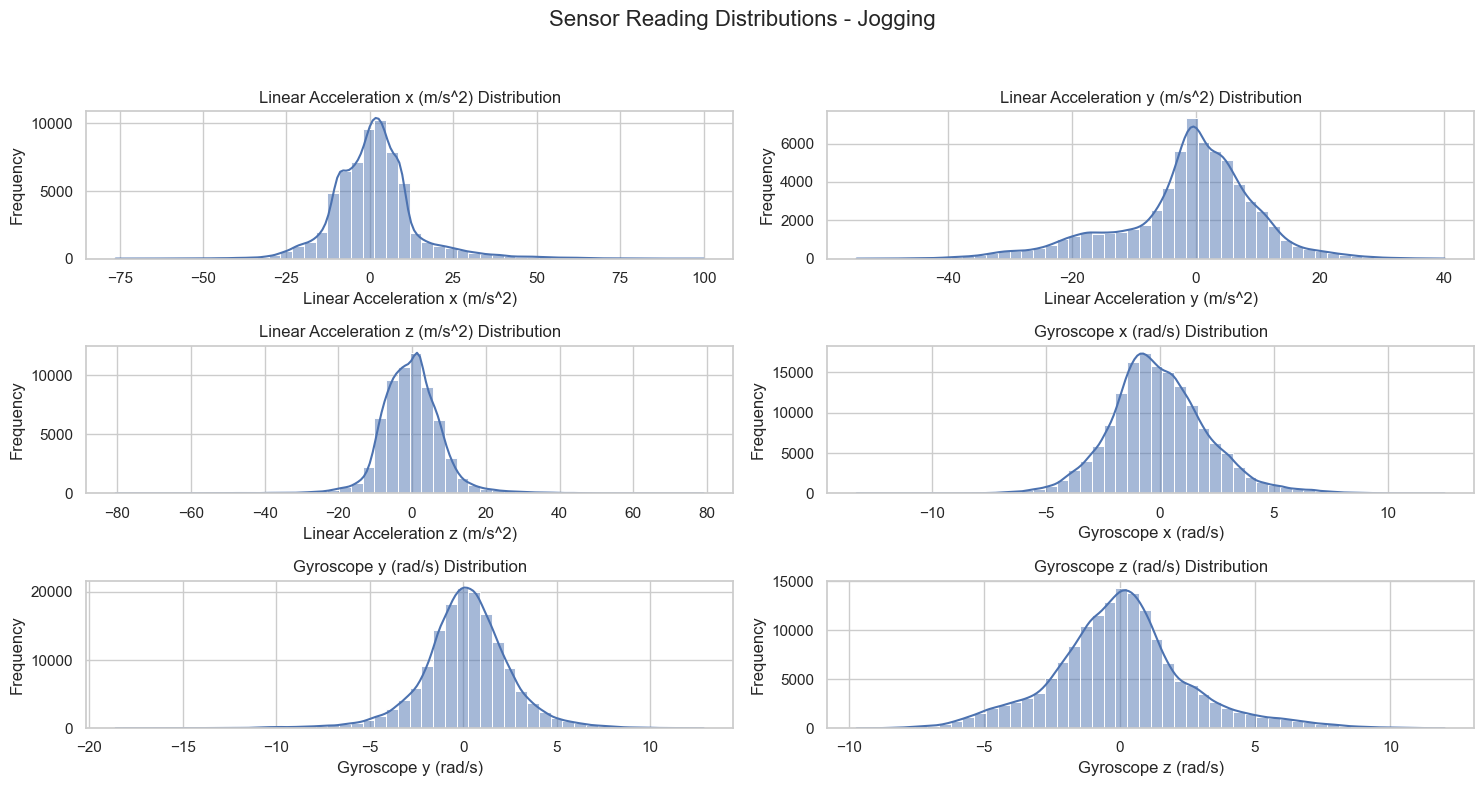

In [56]:
plot_sensor_histograms(walking_df, "Walking")
plot_sensor_histograms(running_df, "Running")
plot_sensor_histograms(jogging_df, "Jogging")


## Feature Engineering

1. Sliding Window Segmentation
You divided each time-series into fixed-size windows (100 samples per window) with 50% overlap.

Each window became one row (sample) in the final dataset.

2. Time-Domain Statistical Features (per window, per axis)
For each of the following sensor axes:

Linear Acceleration x/y/z

Gyroscope x/y/z

Acceleration Magnitude: √(x² + y² + z²)

Gyroscope Magnitude: √(x² + y² + z²)

You computed these statistical features:

Mean

Standard Deviation

Minimum

Maximum

Median

Skewness (asymmetry of distribution)

Kurtosis (peakedness or flatness)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.fft import fft

# ---- CONFIG ---- #
window_size = 100  # Number of samples per window
overlap = 0.5      # 50% overlap

# ---- SENSOR COLUMNS ---- #
accel_cols = [
    'Linear Acceleration x (m/s^2)',
    'Linear Acceleration y (m/s^2)',
    'Linear Acceleration z (m/s^2)'
]
gyro_cols = [
    'Gyroscope x (rad/s)',
    'Gyroscope y (rad/s)',
    'Gyroscope z (rad/s)'
]
sensor_columns = accel_cols + gyro_cols

# ---- DATA CLEANING FUNCTION ---- #
def clean_dataframe(df):
    # Fix commas in decimals and trim whitespace
    df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)
    df.columns = df.columns.str.strip()

    # Ensure correct label column name
    label_col = [col for col in df.columns if col.lower() == "label"]
    if label_col:
        df.rename(columns={label_col[0]: "Label"}, inplace=True)

    # Convert relevant columns to numeric
    for col in sensor_columns + ['Time (s)']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with missing values
    return df.dropna()

# ---- FEATURE EXTRACTION FUNCTION ---- #
def extract_features(df, window_size=100, overlap=0.5):
    features = []
    labels = []

    df['accel_magnitude'] = np.sqrt(df[accel_cols[0]]**2 + df[accel_cols[1]]**2 + df[accel_cols[2]]**2)
    df['gyro_magnitude'] = np.sqrt(df[gyro_cols[0]]**2 + df[gyro_cols[1]]**2 + df[gyro_cols[2]]**2)

    all_cols = sensor_columns + ['accel_magnitude', 'gyro_magnitude']
    step = int(window_size * (1 - overlap))

    for start in range(0, len(df) - window_size + 1, step):
        window = df.iloc[start:start+window_size]
        label = window["Label"].mode()[0]  # most frequent label

        feature_vector = []
        for col in all_cols:
            values = window[col].values
            # Time-domain stats
            feature_vector += [
                np.mean(values),
                np.std(values),
                np.min(values),
                np.max(values),
                np.median(values),
                skew(values),
                kurtosis(values)
            ]
            # Frequency-domain
            fft_vals = np.abs(fft(values))
            fft_vals = fft_vals[:len(fft_vals)//2]  # only positive frequencies
            feature_vector.append(np.sum(fft_vals))            # energy
            feature_vector.append(np.max(fft_vals))            # peak amp
            feature_vector.append(np.argmax(fft_vals))         # dominant freq

        features.append(feature_vector)
        labels.append(label)

    return pd.DataFrame(features), labels

# ---- LOAD AND PROCESS ALL DATASETS ---- #
walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (2).csv")
running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")
jogging_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/jogging - Jogging (1).csv")
print("Columns in walking_df:", walking_df.columns.tolist())
print("Columns in running_df:", running_df.columns.tolist())
print("Columns in jogging_df:", jogging_df.columns.tolist())


# Clean
walking_df = clean_dataframe(walking_df)
running_df = clean_dataframe(running_df)
jogging_df = clean_dataframe(jogging_df)

# Feature extraction
walking_features, walking_labels = extract_features(walking_df, window_size, overlap)
running_features, running_labels = extract_features(running_df, window_size, overlap)
jogging_features, jogging_labels = extract_features(jogging_df, window_size, overlap)

# Combine into single dataset
combined_df = pd.concat([
    pd.DataFrame(walking_features),
    pd.DataFrame(running_features),
    pd.DataFrame(jogging_features)
], ignore_index=True)

combined_df['label'] = walking_labels + running_labels + jogging_labels

# ---- CHECK RESULT ---- #
print("Final dataset shape:", combined_df.shape)
print("Label counts:\n", combined_df['label'].value_counts())
print(combined_df.head())

print("Columns in walking_df:", walking_df.columns.tolist())
print("Columns in running_df:", running_df.columns.tolist())
print("Columns in jogging_df:", jogging_df.columns.tolist())



/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/3536339907.py:85: DtypeWarning: Columns (1,2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (2).csv")
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/3536339907.py:86: DtypeWarning: Columns (1,2,3,4,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")


Columns in walking_df: ['Experiment', 'Time (s)', 'Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Time (s).1', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)', 'Label']
Columns in running_df: ['experiment', 'Time (s)', 'Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Time (s).1', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)', 'Absolute (rad/s)', 'Label']
Columns in jogging_df: ['1', 'Time (s)', 'Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Time (s).1', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)', 'Label']


/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/3536339907.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/3536339907.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_45975/3536339907.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)


Final dataset shape: (1656, 81)
Label counts:
 label
jogging    1293
running     243
walking     120
Name: count, dtype: int64
          0         1     2     3         4         5         6           7  \
0  0.111934  1.316926 -2.11  2.74  0.233000  0.171999 -1.039739  339.176536   
1  0.044652  1.500165 -3.69  2.64  0.446500 -0.745010 -0.344325  335.639734   
2 -0.123100  1.309518 -3.69  1.86  0.242000 -1.061666  0.238978  287.985884   
3  0.004099  0.609272 -1.18  1.19 -0.004313  0.029592 -0.792517  154.773709   
4  0.098451  0.670263 -1.18  1.51  0.224000  0.021334 -0.690193  165.402000   

           8  9  ...        71        72        73        74        75  \
0  66.414331  1  ...  1.085272  0.592840  4.291923  2.096692  0.314019   
1  72.501157  1  ...  0.906152  0.474093  4.291923  3.330751 -0.808014   
2  60.493325  1  ...  1.033810  0.474093  4.206051  2.503008 -0.018621   
3  22.768912  1  ...  0.761877  0.829518  3.592353  1.916600  0.330925   
4  31.598069  1  ...  0.8222

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy.fft import fft

# ---- CONFIG ---- #
window_size = 100  # Number of samples per window
overlap = 0.5      # 50% overlap

# ---- SENSOR COLUMNS ---- #
accel_cols = [
    'Linear Acceleration x (m/s^2)',
    'Linear Acceleration y (m/s^2)',
    'Linear Acceleration z (m/s^2)'
]
gyro_cols = [
    'Gyroscope x (rad/s)',
    'Gyroscope y (rad/s)',
    'Gyroscope z (rad/s)'
]
sensor_columns = accel_cols + gyro_cols

# ---- CLEANING FUNCTION ---- #
def clean_dataframe(df):
    df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)
    df.columns = df.columns.str.strip()
    label_col = [col for col in df.columns if col.lower().strip() == "label"]
    if label_col:
        df.rename(columns={label_col[0]: "Label"}, inplace=True)
    else:
        raise KeyError("Label column not found in dataframe!")

    for col in sensor_columns + ['Time (s)']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df.dropna()

# ---- FEATURE EXTRACTION ---- #
def extract_features(df, window_size=100, overlap=0.5):
    features = []
    labels = []

    # Magnitude
    df['accel_magnitude'] = np.sqrt(df[accel_cols[0]]**2 + df[accel_cols[1]]**2 + df[accel_cols[2]]**2)
    df['gyro_magnitude'] = np.sqrt(df[gyro_cols[0]]**2 + df[gyro_cols[1]]**2 + df[gyro_cols[2]]**2)

    # Jerk and Angular Jerk
    for col in accel_cols:
        df[f'{col}_jerk'] = df[col].astype(float).diff()
    for col in gyro_cols:
        df[f'{col}_jerk'] = df[col].astype(float).diff()

    df['accel_jerk_magnitude'] = np.sqrt(
        df[f'{accel_cols[0]}_jerk']**2 + df[f'{accel_cols[1]}_jerk']**2 + df[f'{accel_cols[2]}_jerk']**2
    )
    df['gyro_jerk_magnitude'] = np.sqrt(
        df[f'{gyro_cols[0]}_jerk']**2 + df[f'{gyro_cols[1]}_jerk']**2 + df[f'{gyro_cols[2]}_jerk']**2
    )

    # Collect all columns to extract features from
    jerk_cols = [f'{col}_jerk' for col in accel_cols + gyro_cols]
    all_cols = sensor_columns + ['accel_magnitude', 'gyro_magnitude'] + jerk_cols + ['accel_jerk_magnitude', 'gyro_jerk_magnitude']

    step = int(window_size * (1 - overlap))

    for start in range(0, len(df) - window_size + 1, step):
        window = df.iloc[start:start+window_size]
        label = window["Label"].mode()[0]

        feature_vector = []
        for col in all_cols:
            values = window[col].dropna().values

            if len(values) == 0:
                stats = [0]*10
            else:
                stats = [
                    np.mean(values),
                    np.std(values),
                    np.min(values),
                    np.max(values),
                    np.median(values),
                    skew(values),
                    kurtosis(values)
                ]
                # FFT-based features
                fft_vals = np.abs(fft(values))
                fft_vals = fft_vals[:len(fft_vals)//2]  # only positive freqs
                stats += [
                    np.sum(fft_vals),        # energy
                    np.max(fft_vals),        # peak amplitude
                    np.argmax(fft_vals)      # dominant frequency bin
                ]

            feature_vector.extend(stats)

        features.append(feature_vector)
        labels.append(label)

    return pd.DataFrame(features), labels

# ---- LOAD FILES ---- #
walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (2).csv")
running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")
jogging_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/jogging - Jogging (1).csv")

# ---- CLEAN ---- #
walking_df = clean_dataframe(walking_df)
running_df = clean_dataframe(running_df)
jogging_df = clean_dataframe(jogging_df)

# ---- EXTRACT FEATURES ---- #
walking_features, walking_labels = extract_features(walking_df, window_size, overlap)
running_features, running_labels = extract_features(running_df, window_size, overlap)
jogging_features, jogging_labels = extract_features(jogging_df, window_size, overlap)

# ---- COMBINE ALL ---- #
combined_df = pd.concat([
    pd.DataFrame(walking_features),
    pd.DataFrame(running_features),
    pd.DataFrame(jogging_features)
], ignore_index=True)

combined_df['label'] = walking_labels + running_labels + jogging_labels

# ---- CHECK ---- #
print("Final dataset shape:", combined_df.shape)
print("Label distribution:\n", combined_df['label'].value_counts())
print(combined_df.head())


/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_51105/1018709408.py:106: DtypeWarning: Columns (1,2,3,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  walking_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/MLG __ Data - walking (2).csv")
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_51105/1018709408.py:107: DtypeWarning: Columns (1,2,3,4,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  running_df = pd.read_csv("/Users/andreea.giurgiu/Desktop/MLG/running - Running (1).csv")
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_51105/1018709408.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().replace(',', '.') if isinstance(x, str) else x)
/var/folders/m9/5pl7flzs3xgd7pv65y92xw_c0000gq/T/ipykernel_51105/1018709408.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df 

Final dataset shape: (1656, 161)
Label distribution:
 label
jogging    1293
running     243
walking     120
Name: count, dtype: int64
          0         1     2     3         4         5         6           7  \
0  0.111934  1.316926 -2.11  2.74  0.233000  0.171999 -1.039739  339.176536   
1  0.044652  1.500165 -3.69  2.64  0.446500 -0.745010 -0.344325  335.639734   
2 -0.123100  1.309518 -3.69  1.86  0.242000 -1.061666  0.238978  287.985884   
3  0.004099  0.609272 -1.18  1.19 -0.004313  0.029592 -0.792517  154.773709   
4  0.098451  0.670263 -1.18  1.51  0.224000  0.021334 -0.690193  165.402000   

           8  9  ...       151       152       153       154       155  \
0  66.414331  1  ...  0.243203  0.045706  1.181499  0.224178  1.339343   
1  72.501157  1  ...  0.161973  0.033541  0.737005  0.227086  0.866706   
2  60.493325  1  ...  0.120025  0.033541  0.549299  0.201072  0.694266   
3  22.768912  1  ...  0.072591  0.039874  0.549299  0.210555  0.795680   
4  31.598069  1  ... 

## Classification

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Separate features and labels
X = combined_df.drop(columns=['label'])
y = combined_df['label']

# Optional: scale features (recommended for models like SVM, KNN)
scaler = StandardScaler()

# Define model pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross_val_score
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy: {:.2f}%".format(scores.mean() * 100))

# Predict using cross_val_predict (for full confusion matrix)
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nOverall Accuracy:", accuracy_score(y, y_pred))


Cross-validated accuracy scores: [0.94879518 0.96374622 0.93353474 0.96676737 0.94561934]
Mean accuracy: 95.17%

Classification Report:
              precision    recall  f1-score   support

     jogging       0.96      0.97      0.97      1293
     running       0.86      0.81      0.83       243
     walking       0.99      1.00      1.00       120

    accuracy                           0.95      1656
   macro avg       0.94      0.93      0.93      1656
weighted avg       0.95      0.95      0.95      1656


Confusion Matrix:
[[1260   32    1]
 [  47  196    0]
 [   0    0  120]]

Overall Accuracy: 0.9516908212560387


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# ---- STEP 1: Prepare Data ---- #
X = combined_df.drop(columns=['label'])
y = combined_df['label']

# Train/Validation split (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---- STEP 2: Define Pipeline ---- #
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# ---- STEP 3: Define Grid for Hyperparameter Tuning ---- #
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# ---- STEP 4: Run Grid Search ---- #
grid_search.fit(X_train, y_train)

print("\n✅ Best parameters found:")
print(grid_search.best_params_)

print("\n📊 Best CV score: {:.2f}%".format(grid_search.best_score_ * 100))

# ---- STEP 5: Evaluate on Validation Set ---- #
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

print("\n🧪 Validation Results:")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))

# ---- STEP 6: Save the Best Model ---- #
joblib.dump(best_model, "best_motion_classifier.pkl")
print("\n💾 Model saved to 'best_motion_classifier.pkl'")


Fitting 5 folds for each of 24 candidates, totalling 120 fits

✅ Best parameters found:
{'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}

📊 Best CV score: 95.24%

🧪 Validation Results:
[[246  13   0]
 [  8  41   0]
 [  0   0  24]]
              precision    recall  f1-score   support

     jogging       0.97      0.95      0.96       259
     running       0.76      0.84      0.80        49
     walking       1.00      1.00      1.00        24

    accuracy                           0.94       332
   macro avg       0.91      0.93      0.92       332
weighted avg       0.94      0.94      0.94       332

Accuracy: 93.67%

💾 Model saved to 'best_motion_classifier.pkl'


### Model test on another person data

In [ ]:
# Load the model
loaded_model = joblib.load("best_motion_classifier.pkl")

# Load test data and clean + feature engineer the same way you did before
# Then extract features as: X_test = ...

# Predict on test data
test_preds = loaded_model.predict(X_test)


### LSTM

In [66]:
def create_lstm_dataset(df, window_size=100, overlap=0.5, sensor_cols=None):
    if sensor_cols is None:
        sensor_cols = accel_cols + gyro_cols

    step = int(window_size * (1 - overlap))
    X, y = [], []

    for start in range(0, len(df) - window_size + 1, step):
        window = df.iloc[start:start + window_size]
        if window.isnull().any().any():
            continue
        X.append(window[sensor_cols].values)
        y.append(window["Label"].mode()[0])

    return np.array(X), np.array(y)


In [67]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Create sequences
sensor_cols = accel_cols + gyro_cols
walking_seq = create_lstm_dataset(walking_df, window_size, overlap, sensor_cols)
running_seq = create_lstm_dataset(running_df, window_size, overlap, sensor_cols)
jogging_seq = create_lstm_dataset(jogging_df, window_size, overlap, sensor_cols)

X = np.concatenate([walking_seq[0], running_seq[0], jogging_seq[0]], axis=0)
y = np.concatenate([walking_seq[1], running_seq[1], jogging_seq[1]], axis=0)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalize each feature across all windows
num_samples, seq_len, num_features = X.shape
X_flat = X.reshape(-1, num_features)
scaler = StandardScaler()
X_flat = scaler.fit_transform(X_flat)
X = X_flat.reshape(num_samples, seq_len, num_features)


In [68]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_encoded)):
    print(f"\nFold {fold + 1}")
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_categorical[train_idx], y_categorical[test_idx]
    break  # Remove this break to train across all folds



Fold 1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,531 (88.01 KB)

 Trainable params: 22,531 (88.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=le.classes_))
